**Objective**: The aim of this project is to develop a solution using Data science and machine learning to predict the compressive strength of a concrete with respect to the its age and the quantity of ingredients used.

**Analysis**: Data analysis involves the following steps.

1. Data Preparation.
2. Exploratory data analysis.
3. Model building.
4. Model deployment.

In [1]:
# Install xlrd package.

! pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [2]:
# Install the following libraries.

import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
# Python logging.

import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

formatter = logging.Formatter('%(asctime)s:%(name)s:%(message)s')

file_handler = logging.FileHandler('model.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)

logger.addHandler(file_handler)

In [4]:
# Reading the given data.

df = pd.read_excel("/kaggle/input/concrete-data/Concrete_Data.xls")
    
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
# Renaming the columns of the data.

df.rename(columns = dict(zip(df.columns, ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate',
       'Fine_Aggregate', 'Age', 'Concrete_Compressive_Strength'])), inplace = True)

In [6]:
# View the data after renaming the columns.

df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [7]:
# Checking null values.

df.isnull().sum()

# There are no null values.

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_Compressive_Strength    0
dtype: int64

In [8]:
# Checking the statistics of every variable.

df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
# Checking the data type of each variable.

df.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_Compressive_Strength    float64
dtype: object

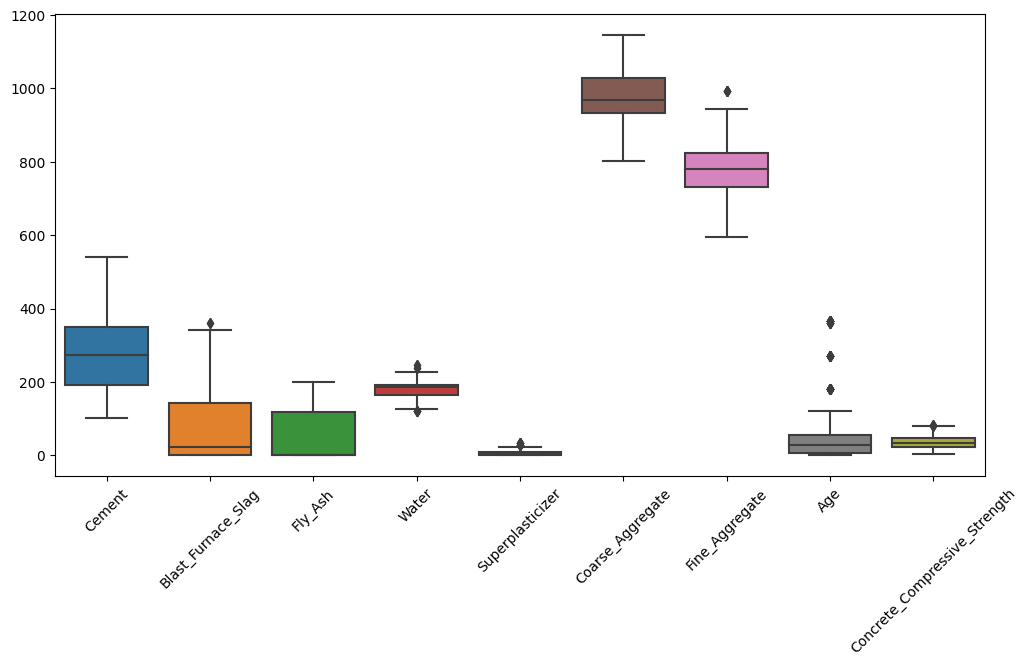

In [10]:
# Checking the data for outliers with box plots.

plt.subplots(figsize = (12, 6))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

# Some variables have outliers.

In [11]:
# Flooring and capping ouliers.

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    df[col][df[col] <= Lower_cap] = Lower_cap
    df[col][df[col] >= Upper_cap] = Upper_cap

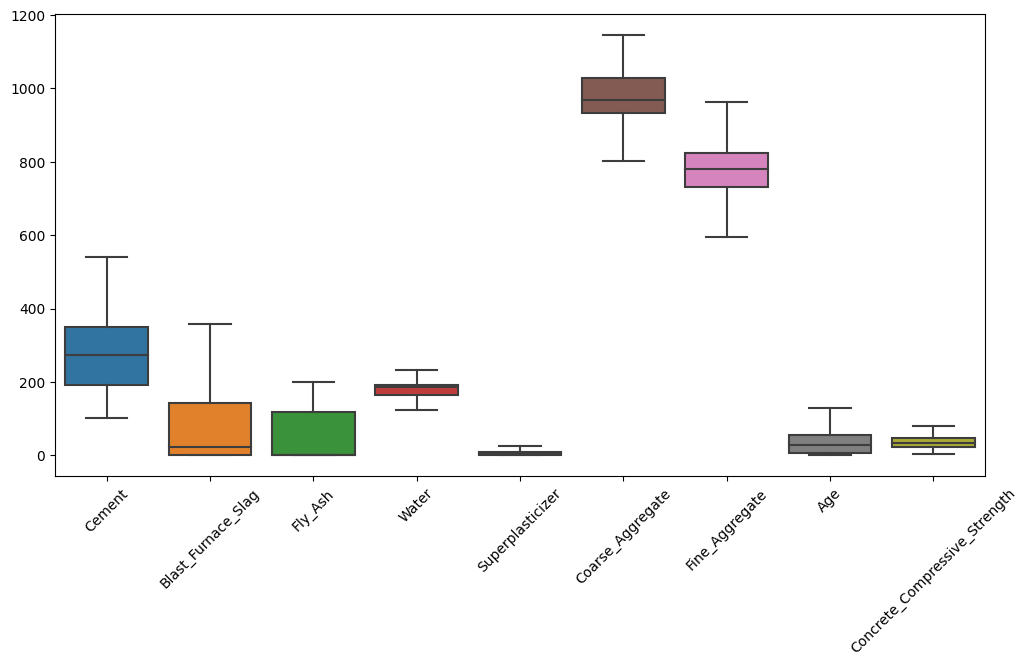

In [12]:
# Box plots of variables after outlier treatment.

plt.subplots(figsize = (12, 6))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

# No outliers found after outlier treatment.

### Distribution of independent variables

ValueError: num must be an integer with 1 <= num <= 8, not 9

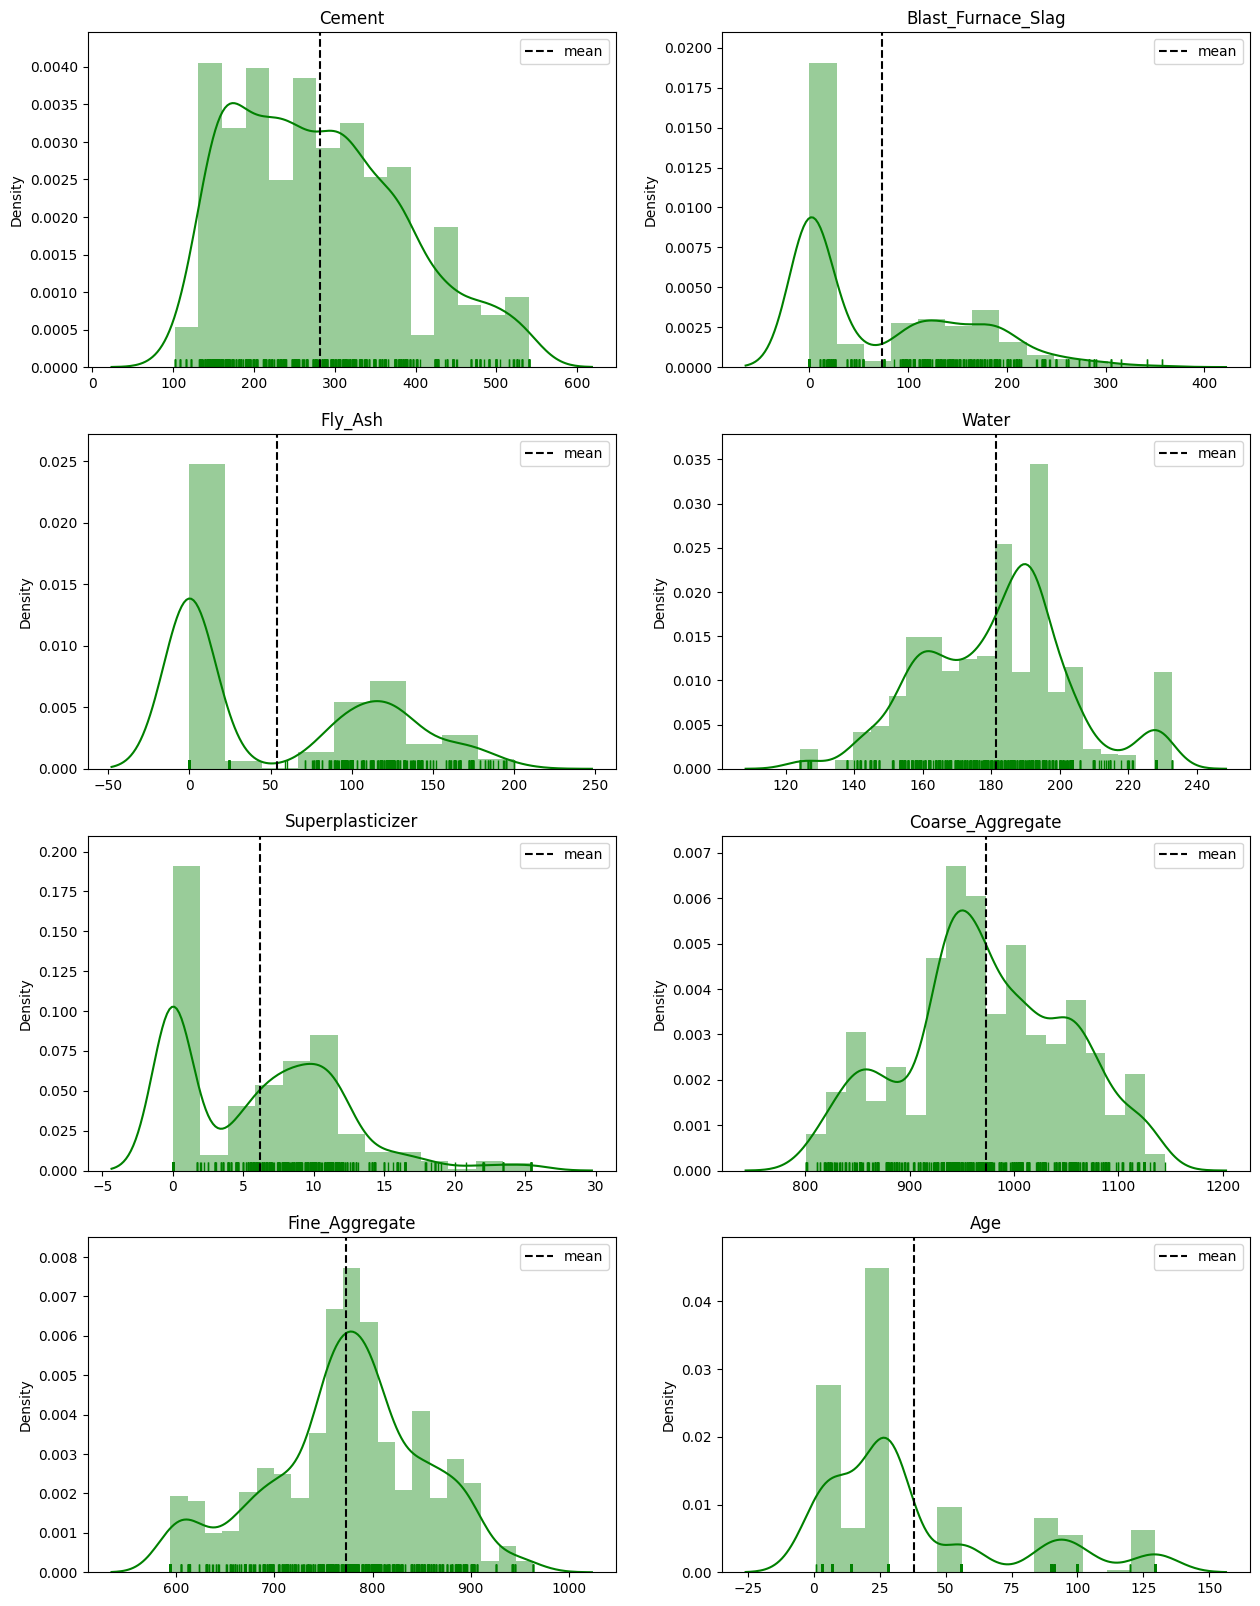

In [13]:
cols = [i for i in df.columns if i != 'Concrete Compressive Strength']

fig = plt.figure(figsize = (15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color='green',rug = True)
    plt.axvline(df[i].mean(),linestyle = "dashed",label = "mean", color = 'black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

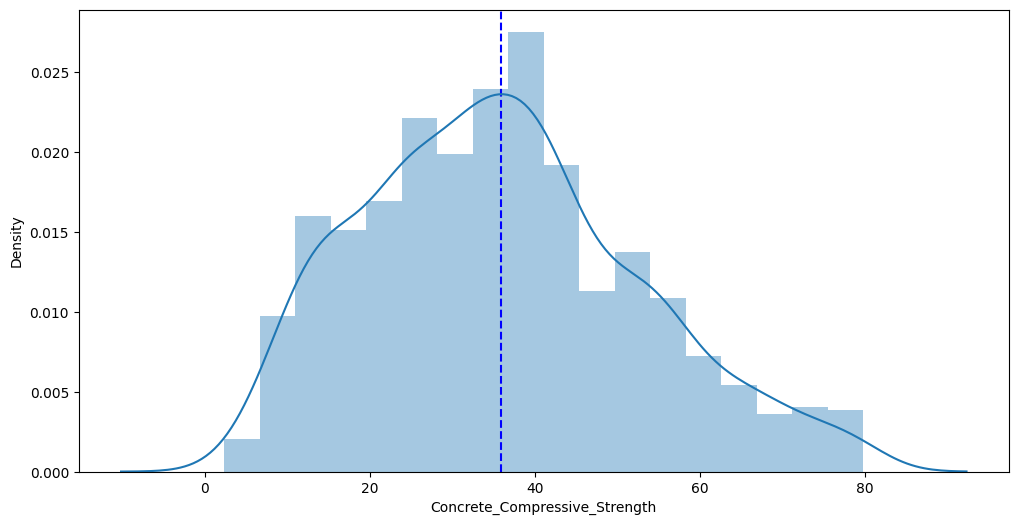

In [14]:
fig = plt.figure(figsize = (12, 6))
plt.axvline(df.Concrete_Compressive_Strength.mean(),linestyle = "dashed",label = "mean", color = 'blue')
sns.distplot(df.Concrete_Compressive_Strength);

### Pair plot

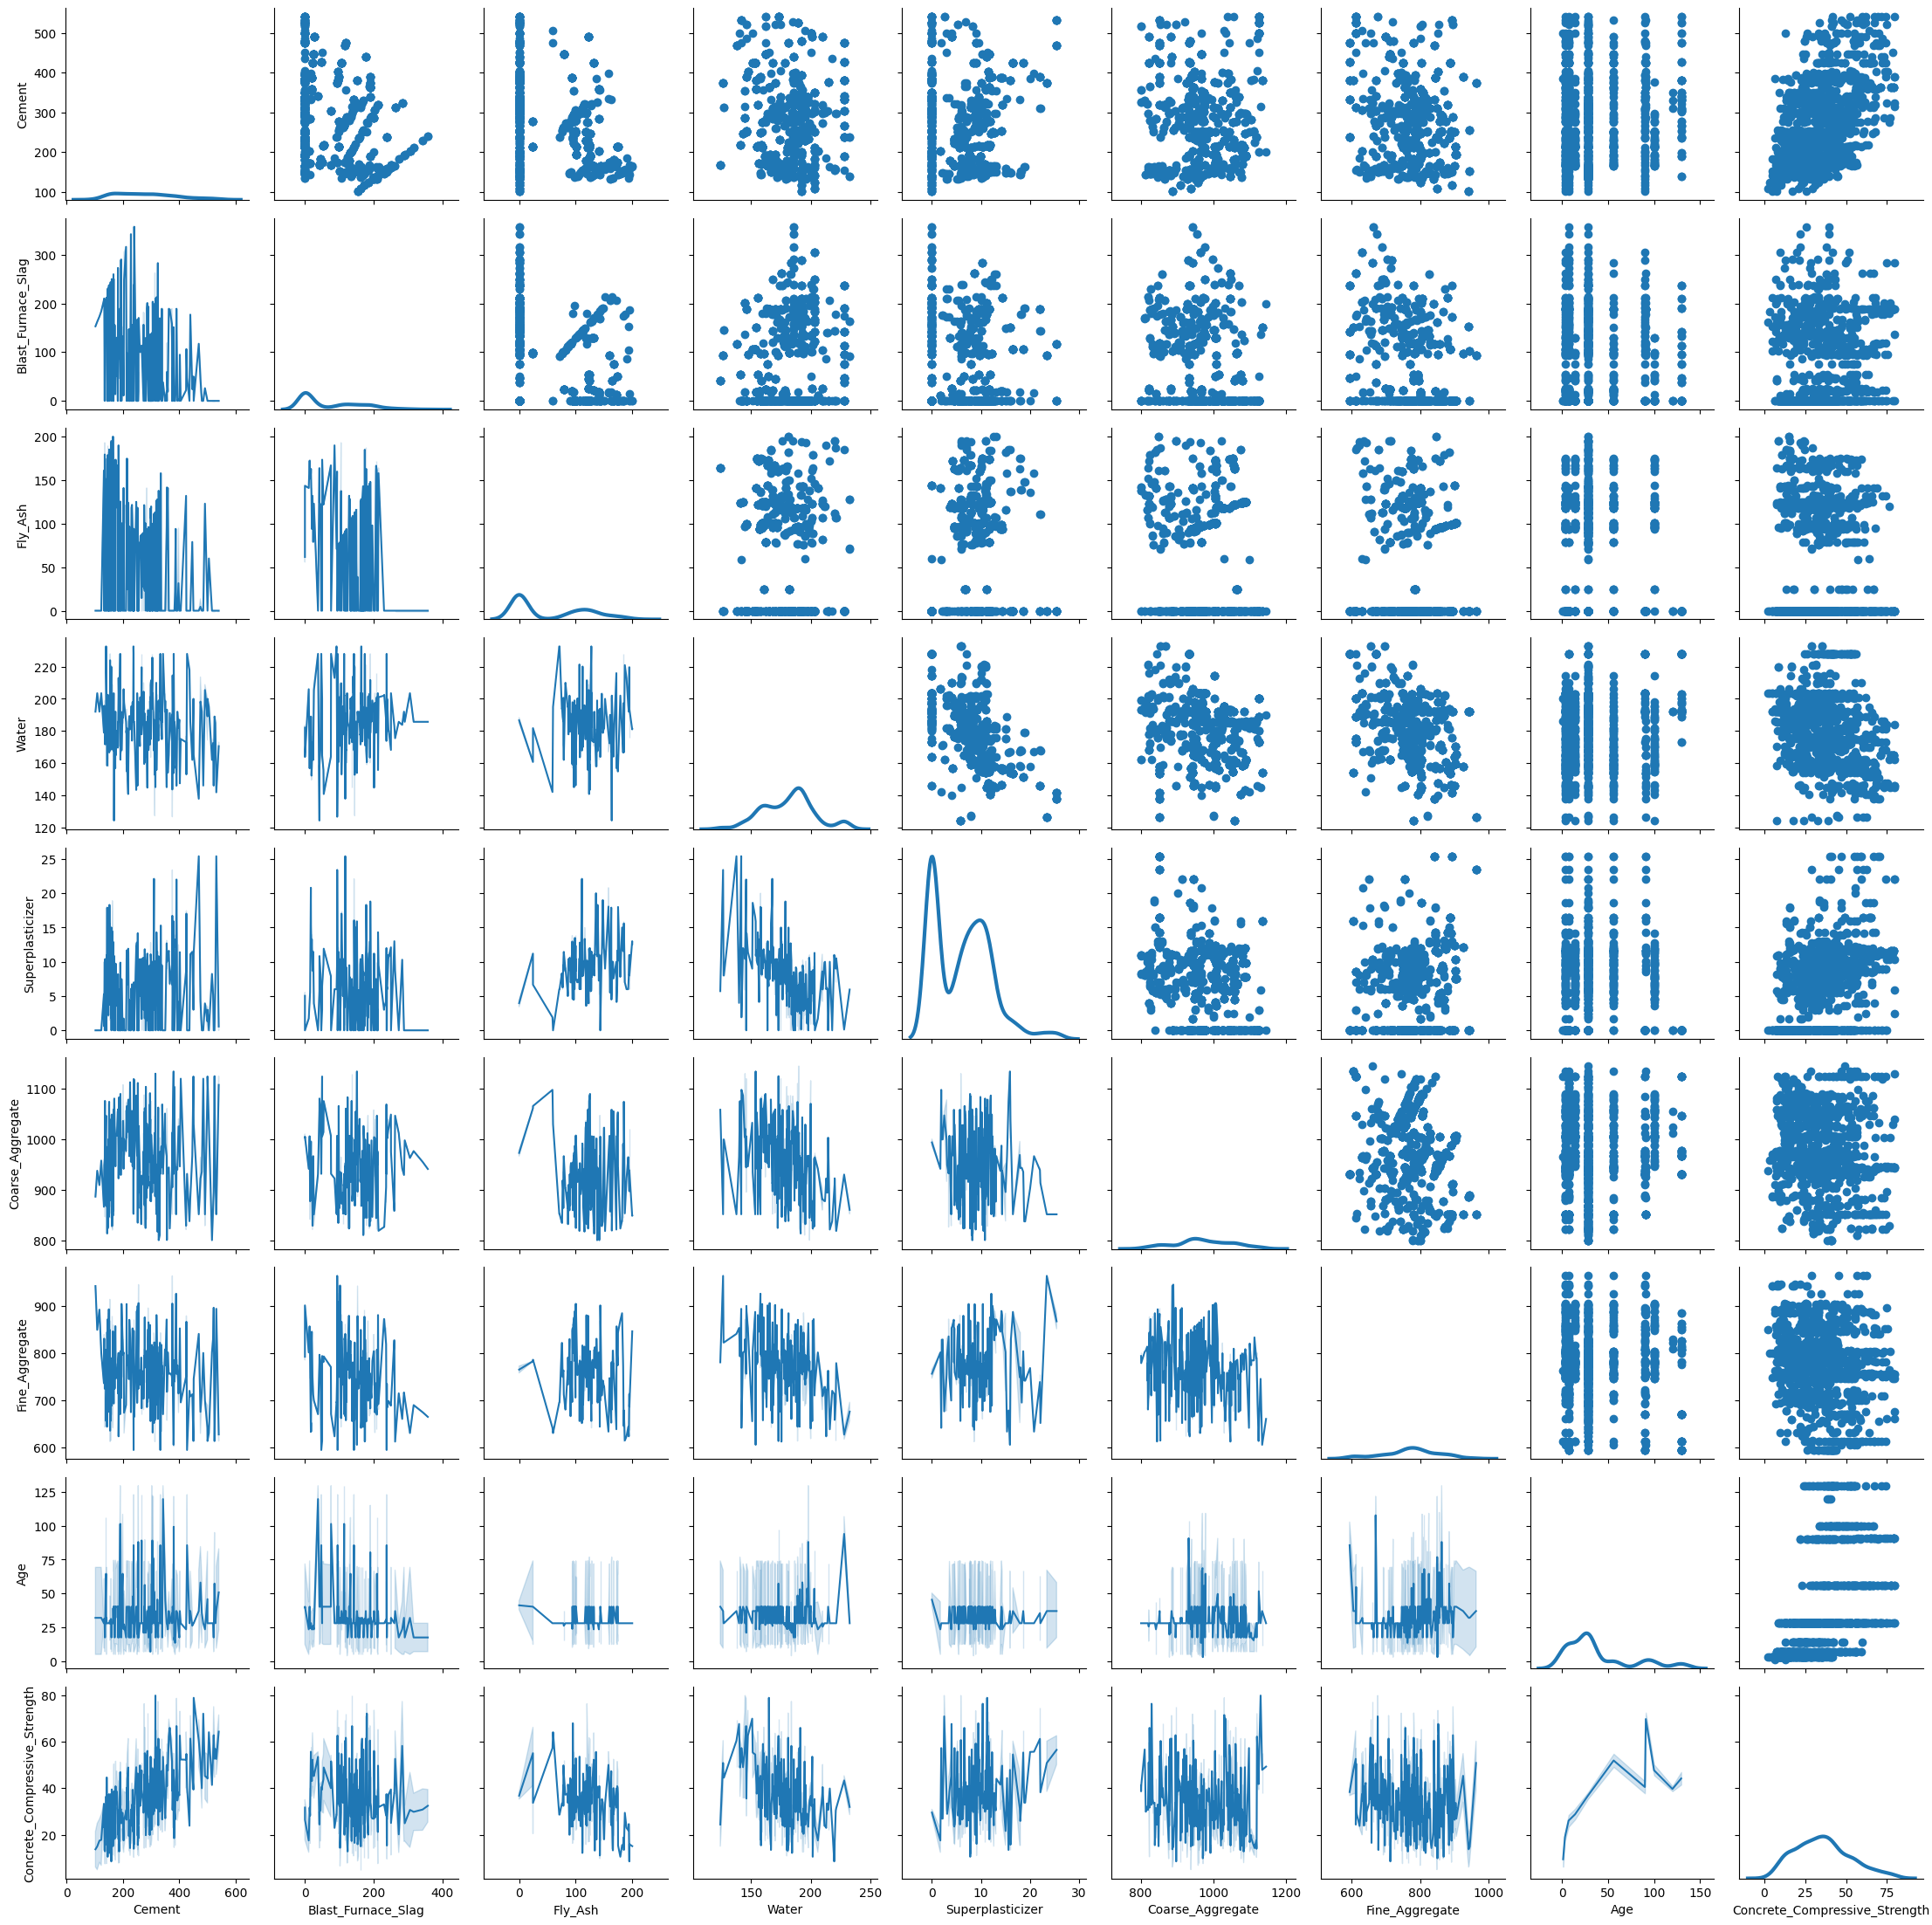

In [15]:
# Build a pair plot

g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw = 3, legend = True);

### Observations:

* Distribution of cement appears nearly normal
* Slag and ash has 2 gaussians and is skewed
* Water and Superplasticizer have near normal distributions
* Concrete_Compressive_Strength is normally distributed

### Heat map

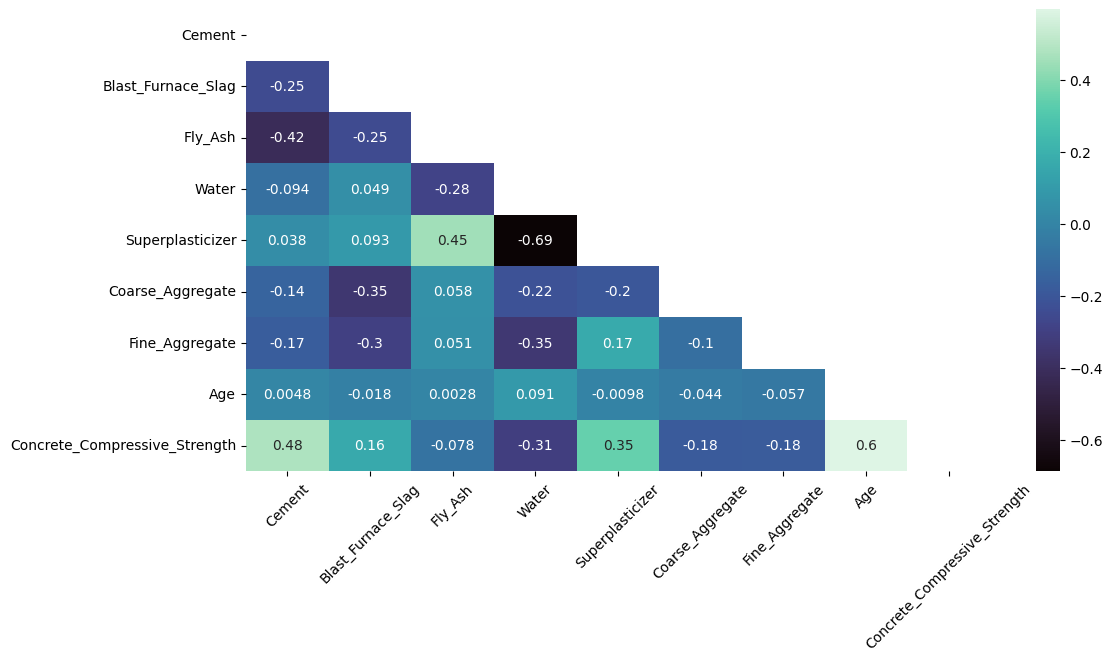

In [16]:
# Checking correlation between variables.

plt.subplots(figsize = (12, 6))
corr = df.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data = corr, cmap = 'mako', annot = True, mask = mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

### Model Building

In [17]:
# Separate dependent and independent variables.

X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [18]:
# Scaling the numeric columns before building the model.

scaler = StandardScaler()

# Transform data.

scaled = scaler.fit_transform(X)

print(scaled)

[[ 2.47791782 -0.85696963 -0.84713204 ...  0.86316012 -1.22139486
  -0.28157186]
 [ 2.47791782 -0.85696963 -0.84713204 ...  1.05617041 -1.22139486
  -0.28157186]
 [ 0.49144303  0.79569792 -0.84713204 ... -0.52651395 -2.24927304
   2.55640645]
 ...
 [-1.2700575   0.75974515  0.85066095 ... -1.03606111  0.08225551
  -0.28157186]
 [-1.16857975  1.3083148  -0.84713204 ...  0.21464556  0.19381789
  -0.28157186]
 [-0.19401043  0.3085959   0.37696733 ... -1.39506025 -0.14964384
  -0.28157186]]


In [19]:
# Converting to dataframe.

scaled_df = pd.DataFrame(scaled, columns = X.columns)

scaled_df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,0.863160,-1.221395,-0.281572
1,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,1.056170,-1.221395,-0.281572
2,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406
3,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406
4,-0.790432,0.678561,-0.847132,0.492916,-1.062193,0.070531,0.652603,2.556406
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488360,0.564569,-0.091564,0.473339,-1.323003,-0.064405,-0.281572
1026,0.392837,-0.856970,0.960095,0.681459,0.732137,-1.994679,0.500928,-0.281572
1027,-1.270057,0.759745,0.850661,0.525911,-0.009750,-1.036061,0.082256,-0.281572
1028,-1.168580,1.308315,-0.847132,-0.280106,0.887415,0.214646,0.193818,-0.281572


### Creating Train and Test data

In [20]:
# Split the data into train and test data.

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state = 100, test_size = 0.30)

print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


### Linear Regression

In [21]:
# Building a Linear Regression model.

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting the test data.

y_pred_lr = lr.predict(X_test)

rms = mean_squared_error(y_test, y_pred_lr, squared = False)

print("RMSE for Linear Regression is", rms)

r2 = r2_score(y_test,y_pred_lr)

print("r2_score for Linear Regression is", r2)

RMSE for Linear Regression is 8.629154134464633
r2_score for Linear Regression is 0.7551557705285659


### Lasso Regression 

In [23]:
# Building a Lassso Regression model.

lassocv = LassoCV(alphas = None, cv = None, max_iter = 10000)

lassocv.fit(X_train, y_train)

LassoCV(max_iter=10000)

In [24]:
# Fitting a Lasso Regression model.

lasso = Lasso(alpha = lassocv.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=0.008283203059486488)

In [25]:
# Predicting the test data.

y_pred_ls = lasso.predict(X_test)

rms = mean_squared_error(y_test, y_pred_ls, squared = False)

print("RMSE for Lasso Regression is", rms)

r2 = r2_score(y_test,y_pred_ls)

print("r2_score for Lasso Regression is", r2)

RMSE for Lasso Regression is 8.630959933132145
r2_score for Lasso Regression is 0.7550532840880491


### Decision Tree Regression

In [26]:
# Building a Decision Tree Regression model.

dtr = DecisionTreeRegressor(random_state = 100)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [27]:
# Predicting the test data.

y_pred_dtr = dtr.predict(X_test)

rms = mean_squared_error(y_test, y_pred_dtr, squared = False)

print("RMSE for Decision Tree Regressor is", rms)

r2 = r2_score(y_test,y_pred_dtr)

print("r2_score for Decision Tree Regressor is", r2)

RMSE for Decision Tree Regressor is 6.606116189282484
r2_score for Decision Tree Regressor is 0.856502004093246


### Random Forest Regression

In [28]:
# Building a Random Forest Regression model.

rfr = RandomForestRegressor(random_state = 100)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [29]:
# Predicting the test data.

y_pred_rfr = rfr.predict(X_test)

rms = mean_squared_error(y_test, y_pred_rfr, squared = False)

print("RMSE for Random Forest Regression is", rms)

r2 = r2_score(y_test,y_pred_rfr)

print("r2_score for Random Forest Regression is", r2)

RMSE for Random Forest Regression is 5.568159078918822
r2_score for Random Forest Regression is 0.8980524745598042


### Ada Boost Regression

In [30]:
# Building a Ada Boost Regression model.

ada = AdaBoostRegressor(random_state = 100)

ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=100)

In [31]:
# Predicting the test data.

y_pred_ada = ada.predict(X_test)

rms = mean_squared_error(y_test, y_pred_ada, squared = False)

print("RMSE for Ada Boost Regression is", rms)

r2 = r2_score(y_test,y_pred_ada)

print("r2_score for Ada Boost Regression is", r2)

RMSE for Ada Boost Regression is 7.766966218566871
r2_score for Ada Boost Regression is 0.8016390166674865


### Gradient Boost Regression

In [32]:
# Building a Gradient Boost Regression model.

gbr = GradientBoostingRegressor(random_state = 100)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=100)

In [33]:
# Predicting the test data.

y_pred_gbr = gbr.predict(X_test)

rms = mean_squared_error(y_test, y_pred_gbr, squared = False)

print("RMSE for Gradient Boost Regression is", rms)

r2 = r2_score(y_test,y_pred_gbr)

print("r2_score for Gradient Boost Regression is", r2)

RMSE for Gradient Boost Regression is 5.300007786101082
r2_score for Gradient Boost Regression is 0.9076352125290366


### XGBoost Regression

In [34]:
# Building a XGBoost Regression model.

xgb = XGBRegressor(random_state = 100)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [35]:
# Predicting the test data.

y_pred_xgb = xgb.predict(X_test)

rms = mean_squared_error(y_test, y_pred_xgb, squared = False)

print("RMSE for XGBoost Regression is", rms)

r2 = r2_score(y_test,y_pred_xgb)

print("r2_score for XGBoost Regression is", r2)

RMSE for XGBoost Regression is 4.787507743481276
r2_score for XGBoost Regression is 0.9246345322534888


### Voting Regression

In [36]:
# Building a Voting Regression model.

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))

vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=0.008283203059486488)),
                            ('Decision Tree',
                             DecisionTreeRegressor(random_state=100)),
                            ('Random Forest',
                             RandomForestRegressor(random_state=100)),
                            ('Ada Boost', AdaBoostRegressor(random_state=100)),
                            ('Gradient Boost',
                             GradientBoostingRegressor(random_state=100)),
                            ('X...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=100, ...))],
                n_jobs=-1, verbose=1,
                weights=(0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))

In [37]:
# Predicting the test data.

y_pred_vr = vr.predict(X_test)

rms = mean_squared_error(y_test, y_pred_vr, squared = False)

print("RMSE for Voting Regressor is", rms)

r2 = r2_score(y_test,y_pred_vr)

print("r2_score for Voting Regressor is", r2)

RMSE for Voting Regressor is 4.931528002207557
r2_score for Voting Regressor is 0.9200319645438696


### Results

In [38]:
# Comparing R2_Score and RMSE of every model.

models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'R2_Score' : [r2_score(y_test,y_pred_lr), r2_score(y_test,y_pred_ls), r2_score(y_test,y_pred_dtr), r2_score(y_test,y_pred_rfr), r2_score(y_test,y_pred_ada),
               r2_score(y_test,y_pred_gbr), r2_score(y_test,y_pred_xgb), r2_score(y_test,y_pred_vr)],
    'RMSE' : [mean_squared_error(y_test, y_pred_lr, squared = False), mean_squared_error(y_test, y_pred_ls, squared = False), mean_squared_error(y_test, y_pred_dtr, squared = False), mean_squared_error(y_test, y_pred_rfr, squared = False), mean_squared_error(y_test, y_pred_ada, squared = False), mean_squared_error(y_test, y_pred_gbr, squared = False), mean_squared_error(y_test, y_pred_xgb, squared = False), mean_squared_error(y_test, y_pred_vr, squared = False)]
})


models.sort_values(by = 'R2_Score', ascending = False)

,Model,R2_Score,RMSE
6,XgBoost,0.924635,4.787508
7,Voting Regressor,0.920032,4.931528
5,Gradient Boost,0.907635,5.300008
3,Random Forest,0.898052,5.568159
2,Decision Tree,0.856502,6.606116
4,Ada Boost,0.801639,7.766966
0,Linear Regression,0.755156,8.629154
1,Lasso Regression,0.755053,8.630960


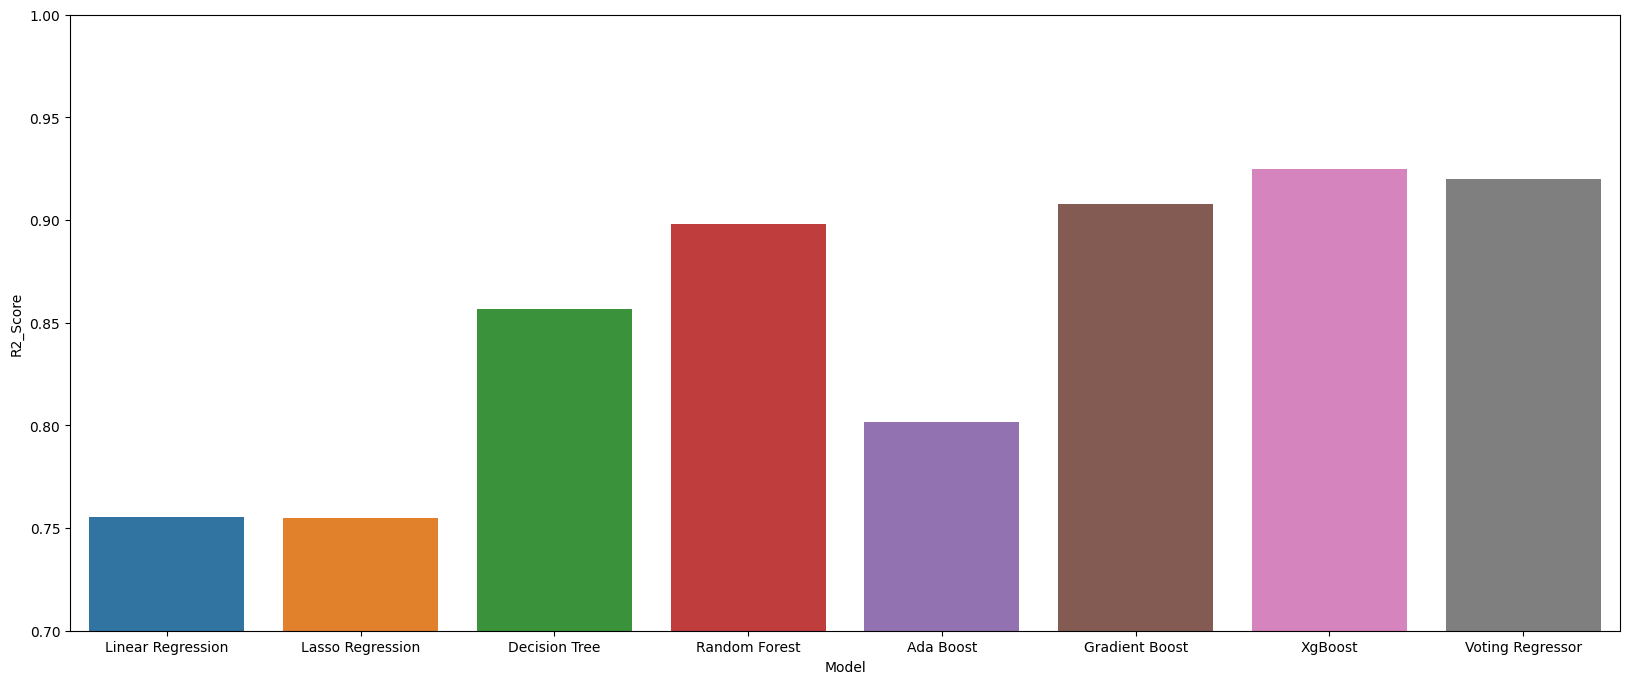

In [39]:
# Comparing R2_Score and RMSE of every model.

plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'R2_Score', data = models)

plt.ylim(0.70, 1)

plt.show()

### Conclusion

XGBoost regression model performs best with highest R2_score of 92.4635% and low RMSE of 4.787508. Hence XGBoost regression can be used for predicting concrete compressive strength. 

In [40]:
# Saving the best model in pickle format.

with open("y_pred_xgb", "wb") as f:
    pickle.dump(xgb, f)

[Voting] ........ (1 of 7) Processing Linear Regression, total=   0.0s
[Voting] ........... (6 of 7) Processing Gradient Boost, total=   0.2s
[Voting] ......... (2 of 7) Processing Lasso Regression, total=   0.0s
[Voting] ................ (5 of 7) Processing Ada Boost, total=   0.2s
[Voting] ............ (3 of 7) Processing Decision Tree, total=   0.0s
[Voting] .................. (7 of 7) Processing XgBoost, total=   0.2s
[Voting] ............ (4 of 7) Processing Random Forest, total=   0.4s


### Model Deployment

In [ ]:
import numpy as np
import pandas as pd
from flask import Flask, render_template, request

"""Application logging"""

# logging.basicConfig(filename='deployment_logs.log', level=logging.INFO,
#                     format='%(levelname)s:%(asctime)s:%(message)s')  # configuring logging operations

app = Flask(__name__)

model = pickle.load(open('y_pred_xgb','rb'))  # loading the saved XGBoost_regressor model

@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def predict():
    """
    For rendering results on HTML GUI

    """
    if request.method == "POST":
        # ['age', 'cement', 'water', 'fly_ash', 'superplasticizer', 'blast_furnace_slag']
        f_list = [request.form.get('Age'), request.form.get('Cement'), request.form.get('Water'),
                  request.form.get('Fly_Ash'),
                  request.form.get('Superplasticizer'), request.form.get('Blast_Furnace_Slag')]  # list of inputs

        # logging operation
#         logging.info(f"Age (in days): {f_list[0]}, Cement (in kg): {f_list[1]},"
#                      f"Water (in kg): {f_list[2]}, Fly ash (in kg): {f_list[3]},"
#                      f"Superplasticizer (in kg): {f_list[4]}, Blast furnace slag (in kg): {f_list[5]}")

        final_features = np.array(f_list).reshape(-1, 6)
        df = pd.DataFrame(final_features)

        prediction = model.predict(df)
        result = "%.2f" % round(prediction[0], 2)

        # logging operation
#         logging.info(f"The Predicted Concrete Compressive strength is {result} MPa")

#         logging.info("Prediction getting posted to the web page.")
        return render_template('index.html',
                               prediction_text = f"The Concrete compressive strength is {result} MPa")


if __name__ == "__main__":
    app.run(debug = True)

### This app can be used to predict compressive strength of a concrete with respect to its age and the quantity of ingredients used.